In [45]:
#Basic and most important libraries
import pandas as pd , numpy as np
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler , MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

#Data processing functions
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


import warnings
warnings.filterwarnings("ignore")

In [2]:
sns.set_theme()

In [3]:
cp = pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/CarPrice.csv")

In [4]:
cp.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [6]:
cp.nunique()

car_ID              205
symboling             6
CarName             147
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

In [7]:
cp.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [8]:
cp.drop(columns=["car_ID","symboling","CarName"],inplace=True)

In [9]:
cp.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [10]:
cp["fueltype"] = le.fit_transform(cp["fueltype"])
cp["aspiration"] = le.fit_transform(cp["aspiration"])
cp["doornumber"] = le.fit_transform(cp["doornumber"])
cp["carbody"] = le.fit_transform(cp["carbody"])
cp["drivewheel"] = le.fit_transform(cp["drivewheel"])
cp["enginelocation"] = le.fit_transform(cp["enginelocation"])
cp["enginetype"] = le.fit_transform(cp["enginetype"])
cp["cylindernumber"] = le.fit_transform(cp["cylindernumber"])
cp["fuelsystem"] = le.fit_transform(cp["fuelsystem"])

In [11]:
cp.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,0,1,0,2,0,88.6,168.8,64.1,48.8,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,1,0,1,0,2,0,88.6,168.8,64.1,48.8,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,0,1,2,2,0,94.5,171.2,65.5,52.4,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,1,0,0,3,1,0,99.8,176.6,66.2,54.3,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,1,0,0,3,0,0,99.4,176.6,66.4,54.3,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0


In [12]:
cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   fueltype          205 non-null    int32  
 1   aspiration        205 non-null    int32  
 2   doornumber        205 non-null    int32  
 3   carbody           205 non-null    int32  
 4   drivewheel        205 non-null    int32  
 5   enginelocation    205 non-null    int32  
 6   wheelbase         205 non-null    float64
 7   carlength         205 non-null    float64
 8   carwidth          205 non-null    float64
 9   carheight         205 non-null    float64
 10  curbweight        205 non-null    int64  
 11  enginetype        205 non-null    int32  
 12  cylindernumber    205 non-null    int32  
 13  enginesize        205 non-null    int64  
 14  fuelsystem        205 non-null    int32  
 15  boreratio         205 non-null    float64
 16  stroke            205 non-null    float64
 1

In [13]:
correlation_mat = cp.corr()

In [14]:
correlation_mat

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
fueltype,1.000000,-0.401397,0.191491,-0.147853,-0.132257,0.040070,-0.308346,-0.212679,-0.233880,-0.284631,...,-0.069594,0.041529,-0.054451,-0.241829,-0.984356,0.163926,0.476883,-0.255963,-0.191392,-0.105679
aspiration,-0.401397,1.000000,-0.031792,0.063028,0.066465,-0.057191,0.257611,0.234539,0.300567,0.087311,...,0.108217,0.288086,0.212614,0.222982,0.295541,0.241685,-0.183383,-0.202362,-0.254416,0.177926
doornumber,0.191491,-0.031792,1.000000,-0.680358,0.098954,0.137757,-0.447357,-0.398568,-0.207168,-0.552208,...,-0.020742,0.015519,-0.119258,0.011082,-0.177888,0.126947,0.247668,0.012417,0.036330,-0.031835
carbody,-0.147853,0.063028,-0.680358,1.000000,-0.155745,-0.277009,0.401362,0.334433,0.131710,0.568534,...,-0.073352,-0.065079,0.010549,-0.015325,0.136243,-0.153928,-0.109643,0.031697,-0.007170,-0.083976
drivewheel,-0.132257,0.066465,0.098954,-0.155745,1.000000,0.147865,0.459745,0.485649,0.470751,-0.019719,...,0.524307,0.424686,0.481827,0.071591,0.127479,0.518686,-0.039417,-0.449581,-0.452220,0.577992
enginelocation,0.040070,-0.057191,0.137757,-0.277009,0.147865,1.000000,-0.187790,-0.050989,-0.051698,-0.106234,...,0.196826,0.105971,0.185042,-0.138455,-0.019762,0.317839,0.198461,-0.153487,-0.102026,0.324973
wheelbase,-0.308346,0.257611,-0.447357,0.401362,0.459745,-0.187790,1.000000,0.874587,0.795144,0.589435,...,0.569329,0.384601,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,-0.212679,0.234539,-0.398568,0.334433,0.485649,-0.050989,0.874587,1.000000,0.841118,0.491029,...,0.683360,0.557810,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,-0.233880,0.300567,-0.207168,0.131710,0.470751,-0.051698,0.795144,0.841118,1.000000,0.279210,...,0.735433,0.521434,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,-0.284631,0.087311,-0.552208,0.568534,-0.019719,-0.106234,0.589435,0.491029,0.279210,1.000000,...,0.067149,0.017046,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336


In [15]:
upper_tri = correlation_mat.where(np.triu(np.ones(correlation_mat.shape),k=1).astype(np.bool))
upper_tri

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
fueltype,NaN,-0.401397,0.191491,-0.147853,-0.132257,0.040070,-0.308346,-0.212679,-0.233880,-0.284631,...,-0.069594,0.041529,-0.054451,-0.241829,-0.984356,0.163926,0.476883,-0.255963,-0.191392,-0.105679
aspiration,NaN,NaN,-0.031792,0.063028,0.066465,-0.057191,0.257611,0.234539,0.300567,0.087311,...,0.108217,0.288086,0.212614,0.222982,0.295541,0.241685,-0.183383,-0.202362,-0.254416,0.177926
doornumber,NaN,NaN,NaN,-0.680358,0.098954,0.137757,-0.447357,-0.398568,-0.207168,-0.552208,...,-0.020742,0.015519,-0.119258,0.011082,-0.177888,0.126947,0.247668,0.012417,0.036330,-0.031835
carbody,NaN,NaN,NaN,NaN,-0.155745,-0.277009,0.401362,0.334433,0.131710,0.568534,...,-0.073352,-0.065079,0.010549,-0.015325,0.136243,-0.153928,-0.109643,0.031697,-0.007170,-0.083976
drivewheel,NaN,NaN,NaN,NaN,NaN,0.147865,0.459745,0.485649,0.470751,-0.019719,...,0.524307,0.424686,0.481827,0.071591,0.127479,0.518686,-0.039417,-0.449581,-0.452220,0.577992
enginelocation,NaN,NaN,NaN,NaN,NaN,NaN,-0.187790,-0.050989,-0.051698,-0.106234,...,0.196826,0.105971,0.185042,-0.138455,-0.019762,0.317839,0.198461,-0.153487,-0.102026,0.324973
wheelbase,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.874587,0.795144,0.589435,...,0.569329,0.384601,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.841118,0.491029,...,0.683360,0.557810,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.279210,...,0.735433,0.521434,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.067149,0.017046,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336


<AxesSubplot:>

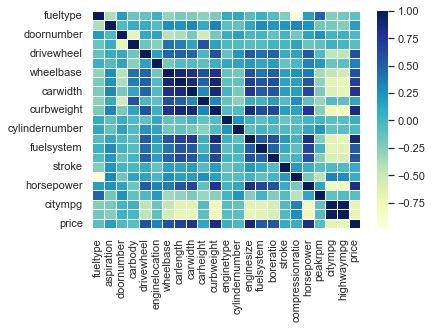

In [16]:
sns.heatmap(correlation_mat,linewidths=.5,cmap="YlGnBu")

In [17]:
price=upper_tri["price"]
to_keep=[]
for cor in price:
    if cor > 0.80:
        to_keep.append(cor)
        
print(price)
print(to_keep)

fueltype           -0.105679
aspiration          0.177926
doornumber         -0.031835
carbody            -0.083976
drivewheel          0.577992
enginelocation      0.324973
wheelbase           0.577816
carlength           0.682920
carwidth            0.759325
carheight           0.119336
curbweight          0.835305
enginetype          0.049171
cylindernumber     -0.027628
enginesize          0.874145
fuelsystem          0.526823
boreratio           0.553173
stroke              0.079443
compressionratio    0.067984
horsepower          0.808139
peakrpm            -0.085267
citympg            -0.685751
highwaympg         -0.697599
price                    NaN
Name: price, dtype: float64
[0.8353048793372975, 0.8741448025245117, 0.8081388225362214]


In [18]:
X = cp.drop(columns=["price"])
Y = cp["price"]
X_train , X_test , y_train , y_test = train_test_split(X,Y,test_size=0.33,random_state=0)

In [19]:
StSc = StandardScaler()
X_train  = StSc.fit_transform(X_train)
X_test  = StSc.fit_transform(X_test)

In [20]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)

In [21]:
from sklearn.metrics import mean_absolute_error as mae
mae(y_test,y_pred)

2523.4125436416357

In [22]:
from sklearn.metrics import mean_squared_error as mse
mse(y_test, y_pred)

12505352.124116704

In [23]:
from sklearn.metrics import mean_absolute_percentage_error as mape
mape(y_test, y_pred)

0.22119701499894845

In [24]:
X_2 = cp.loc[0:,["horsepower","curbweight","enginesize"]]

In [25]:
X_2

,horsepower,curbweight,enginesize
0,111,2548,130
1,111,2548,130
2,154,2823,152
3,102,2337,109
4,115,2824,136
...,...,...,...
200,114,2952,141
201,160,3049,141
202,134,3012,173
203,106,3217,145


In [26]:
Y = cp["price"]
X_train , X_test , y_train , y_test = train_test_split(X_2,Y,test_size=0.33,random_state=0)

In [27]:
StSc = StandardScaler()
X_train  = StSc.fit_transform(X_train)
X_test  = StSc.fit_transform(X_test)

In [28]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)

In [29]:
from sklearn.metrics import mean_absolute_error as mae
mae(y_test,y_pred)

2537.3371217455538

In [30]:
from sklearn.metrics import mean_squared_error as mse
mse(y_test, y_pred)

12840249.910697054

In [31]:
from sklearn.metrics import mean_absolute_percentage_error as mape
mape(y_test, y_pred)

0.20352739496745453

In [32]:
cp_2 = X_2

In [33]:
cp_2["price"]=Y

In [34]:
cp_2.head()

,horsepower,curbweight,enginesize,price
0,111,2548,130,13495.0
1,111,2548,130,16500.0
2,154,2823,152,16500.0
3,102,2337,109,13950.0
4,115,2824,136,17450.0


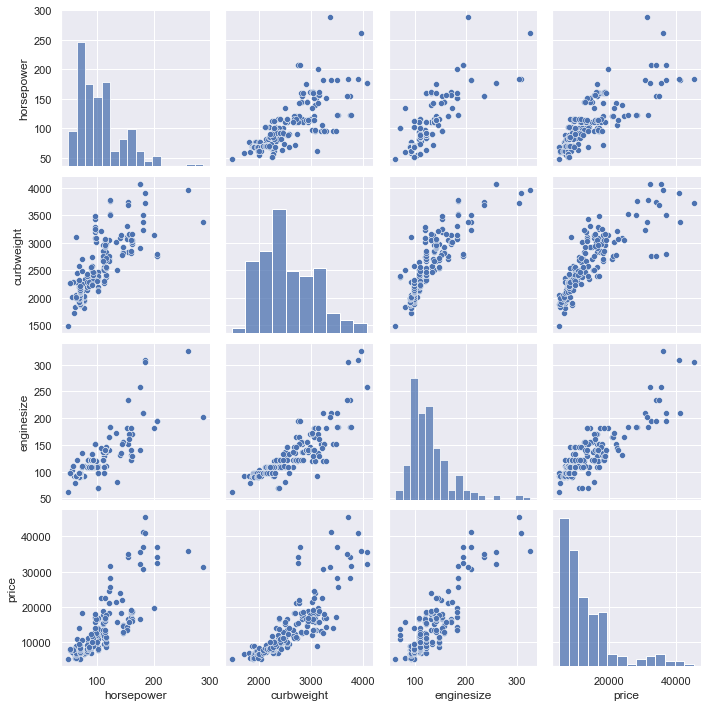

In [35]:
sns.pairplot(cp_2)
plt.show()

In [36]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False)

In [37]:
X_2 = np.array(X_2)
poly_features = poly.fit_transform(X_2.reshape(-1, 1))

In [38]:
Y = cp["price"]
X_train , X_test , y_train , y_test = train_test_split(X_2,Y,test_size=0.35,random_state=0)

In [39]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)

In [40]:
from sklearn.metrics import mean_absolute_error as mae
mae(y_test,y_pred)

1.9958355955572594e-12

In [41]:
from sklearn.metrics import mean_squared_error as mse
mse(y_test, y_pred)

1.3211912561610858e-23

In [42]:
from sklearn.metrics import mean_absolute_percentage_error as mape
mape(y_test, y_pred)

1.5755651432183016e-16